In [2]:
# Library Imports.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Allows plots to appear directly in the notebook.
%matplotlib inline

#from patsy import dmatrices
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score 
from sklearn.preprocessing import PolynomialFeatures

In [3]:
df = pd.read_csv("mean-bikes-available.csv")
df.head()

,station_number,hour,weekend,mean_bikes_avail
0,2,0,False,10.953333
1,2,0,True,9.859155
2,2,1,False,11.375839
3,2,1,True,10.166667
4,2,2,False,11.382550


In [4]:
df[['station_number', 'hour', 'weekend', 'mean_bikes_avail']].corr()

,station_number,hour,weekend,mean_bikes_avail
station_number,1.000000e+00,7.427845e-17,9.979994e-19,0.107843
hour,7.427845e-17,1.000000e+00,-7.776299e-19,-0.022725
weekend,9.979994e-19,-7.776299e-19,1.000000e+00,0.019898
mean_bikes_avail,1.078430e-01,-2.272484e-02,1.989760e-02,1.000000


<AxesSubplot:xlabel='station_number', ylabel='mean_bikes_avail'>

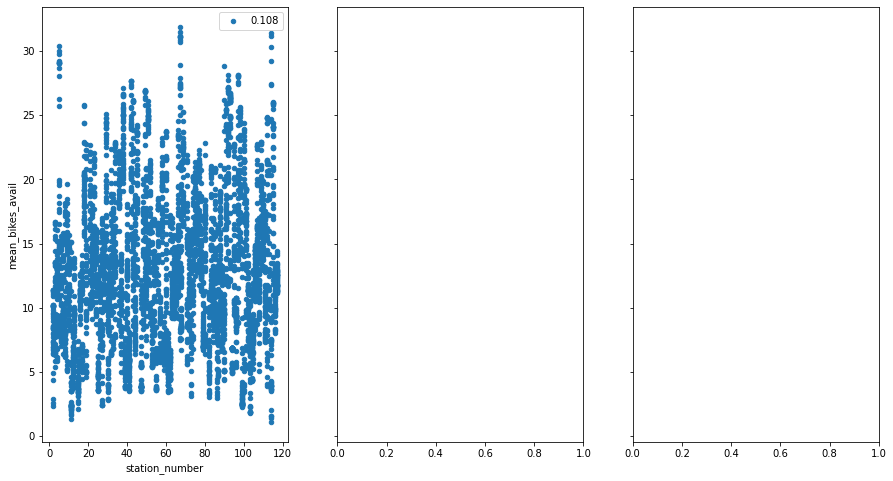

In [5]:
fig, axs = plt.subplots(1,3, sharey=True)
df.plot(kind='scatter', x='station_number', y='mean_bikes_avail', label="%.3f" % df[['station_number', 'mean_bikes_avail']].corr().to_numpy()[0,1], ax=axs[0], figsize=(15, 8))

In [6]:
df_weekday = df[df['weekend'] == False]
df_weekday_2 = df_weekday[df_weekday['station_number'] == 2]
X = df_weekday_2[['hour']]
y = df_weekday_2.mean_bikes_avail

print("\nDescriptive features in X:\n", X)
print("\nTarget feature in y:\n", y)


Descriptive features in X:
     hour
0      0
2      1
4      2
6      3
8      4
10     5
12     6
14     7
16     8
18     9
20    10
22    11
24    12
26    13
28    14
30    15
32    16
34    17
36    18
38    19
40    20
42    21
44    22
46    23

Target feature in y:
 0     10.953333
2     11.375839
4     11.382550
6     11.409396
8     11.342282
10    11.353333
12    10.221477
14     6.426667
16     4.909677
18     2.371795
20     2.574194
22     2.897436
24     4.371795
26     7.297468
28     6.922619
30     6.796178
32     6.685185
34     6.484472
36     8.371069
38     8.956790
40     9.592593
42    10.197452
44    11.093960
46    11.241611
Name: mean_bikes_avail, dtype: float64


In [7]:
df_weekday_2[['hour', 'mean_bikes_avail']].corr()

,hour,mean_bikes_avail
hour,1.000000,-0.114242
mean_bikes_avail,-0.114242,1.000000


In [8]:
poly = PolynomialFeatures(degree = 2)
X_poly_df = pd.DataFrame(X)
X_poly_df

,hour
0,0
2,1
4,2
6,3
8,4
10,5
12,6
14,7
16,8
18,9


In [9]:
X

,hour
0,0
2,1
4,2
6,3
8,4
10,5
12,6
14,7
16,8
18,9


In [11]:
X_train_poly = poly.fit_transform(X_poly_df)
model = LinearRegression()
model = model.fit(X_train_poly, y)

In [13]:
print("Features: \n", '[hour]')
print("Coeficients: \n", model.coef_)
print("\nIntercept: \n", model.intercept_)

Features: 
 [hour]
Coeficients: 
 [ 0.         -1.35799881  0.05688048]

Intercept: 
 13.503569038246264


In [14]:
model_coefficients = model.coef_
model_intercept = model.intercept_

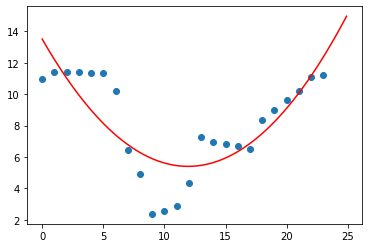

In [15]:
plt.scatter(df_weekday_2['hour'], df_weekday_2['mean_bikes_avail'])
x_axis = np.arange(0,25,0.1)
response = model_intercept + model_coefficients[1] * x_axis + model_coefficients[2] * x_axis**2
plt.plot(x_axis, response, color='r')
plt.show()

## Trying Poly Regression with Dynamic Test Data

In [16]:
df_dynamic = pd.read_csv("dynamic-table-train.csv")
df_dynamic.head()

,station_number,hour,date,weekend,available_bikes
0,2,13,17 Feb,False,9
1,2,13,17 Feb,False,9
2,2,14,17 Feb,False,9
3,2,14,17 Feb,False,9
4,2,14,17 Feb,False,9


In [18]:
df_dynamic_weekday = df_dynamic[df_dynamic['weekend'] == False]
df_dynamic_weekday_2 = df_dynamic_weekday[df_dynamic_weekday['station_number'] == 2]
X = df_dynamic_weekday_2[['hour']]
y = df_dynamic_weekday_2.available_bikes

print("\nDescriptive features in X:\n", X)
print("\nTarget feature in y:\n", y)


Descriptive features in X:
       hour
0       13
1       13
2       14
3       14
4       14
...    ...
4375    13
4376    14
4377    14
4378    14
4379    14

[2946 rows x 1 columns]

Target feature in y:
 0       9
1       9
2       9
3       9
4       9
       ..
4375    1
4376    0
4377    0
4378    2
4379    1
Name: available_bikes, Length: 2946, dtype: int64


In [24]:
df_dynamic_weekday_2[['hour', 'available_bikes']].corr()

,hour,available_bikes
hour,1.000000,-0.130141
available_bikes,-0.130141,1.000000


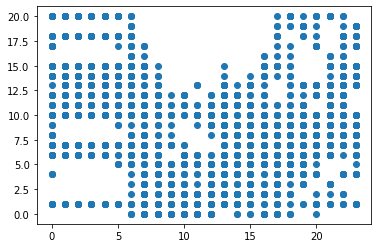

In [21]:
plt.scatter(df_dynamic_weekday_2['hour'], df_dynamic_weekday_2['available_bikes'])
plt.show()

In [22]:
df_dynamic_weekday_2

,station_number,hour,date,weekend,available_bikes
0,2,13,17 Feb,False,9
1,2,13,17 Feb,False,9
2,2,14,17 Feb,False,9
3,2,14,17 Feb,False,9
4,2,14,17 Feb,False,9
...,...,...,...,...,...
4375,2,13,25 Mar,False,1
4376,2,14,25 Mar,False,0
4377,2,14,25 Mar,False,0
4378,2,14,25 Mar,False,2


No idea why the data is like that in the scatter plot - probably to do with it being clumped together on different date values in here but that won't be usable for the regression, so stick with the mean-available datasets

## Train models on the mean available test set

In [26]:
df_train = pd.read_csv("mean-bikes-available-train.csv")
df_train.head()

,station_number,hour,weekend,available_bikes
0,2,0,False,11.883333
1,2,0,True,10.847458
2,2,1,False,12.378151
3,2,1,True,11.000000
4,2,2,False,12.386555


In [60]:
df_test = pd.read_csv("mean-bikes-available-test.csv")
df_test.head()

,station_number,hour,weekend,available_bikes
0,2,0,False,7.233333
1,2,0,True,5.000000
2,2,1,False,7.400000
3,2,1,True,6.000000
4,2,2,False,7.400000


In [27]:
df_train

,station_number,hour,weekend,available_bikes
0,2,0,False,11.883333
1,2,0,True,10.847458
2,2,1,False,12.378151
3,2,1,True,11.000000
4,2,2,False,12.386555
...,...,...,...,...
5275,117,21,True,12.550000
5276,117,22,False,13.025000
5277,117,22,True,12.600000
5278,117,23,False,12.529412


In [61]:
df_test

,station_number,hour,weekend,available_bikes
0,2,0,False,7.233333
1,2,0,True,5.000000
2,2,1,False,7.400000
3,2,1,True,6.000000
4,2,2,False,7.400000
...,...,...,...,...
5275,117,21,True,9.666667
5276,117,22,False,11.333333
5277,117,22,True,8.500000
5278,117,23,False,11.365854


In [33]:
unique_station_numbers = df_train['station_number'].unique()
unique_station_numbers

array([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  15,
        16,  17,  18,  19,  21,  22,  23,  24,  25,  26,  27,  28,  29,
        30,  31,  32,  33,  34,  36,  37,  38,  39,  40,  41,  42,  43,
        44,  45,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,
        58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  71,
        72,  73,  74,  75,  76,  77,  78,  79,  80,  82,  83,  84,  85,
        86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
        99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
       112, 113, 114, 115, 116, 117], dtype=int64)

In [36]:
if 70 in unique_station_numbers:
    print("Yarp")
else:
    print("Narp")

Narp


In [48]:
df_train_list = []
for number in unique_station_numbers:
    temporary_df = pd.DataFrame(df_train[df_train['station_number']==number])
    df_train_list.append(temporary_df)
df_train_list

[    station_number  hour  weekend  available_bikes
 0                2     0    False        11.883333
 1                2     0     True        10.847458
 2                2     1    False        12.378151
 3                2     1     True        11.000000
 4                2     2    False        12.386555
 5                2     2     True        11.000000
 6                2     3    False        12.420168
 7                2     3     True        11.067797
 8                2     4    False        12.336134
 9                2     4     True        11.000000
 10               2     5    False        12.341667
 11               2     5     True        11.000000
 12               2     6    False        11.166667
 13               2     6     True        10.916667
 14               2     7    False         7.200000
 15               2     7     True        10.216667
 16               2     8    False         4.960000
 17               2     8     True         9.400000
 18         

In [62]:
df_test_list = []
for number in unique_station_numbers:
    temporary_df = pd.DataFrame(df_test[df_test['station_number']==number])
    df_test_list.append(temporary_df)
df_test_list

[    station_number  hour  weekend  available_bikes
 0                2     0    False         7.233333
 1                2     0     True         5.000000
 2                2     1    False         7.400000
 3                2     1     True         6.000000
 4                2     2    False         7.400000
 5                2     2     True         6.000000
 6                2     3    False         7.400000
 7                2     3     True         6.000000
 8                2     4    False         7.400000
 9                2     4     True         6.000000
 10               2     5    False         7.400000
 11               2     5     True         6.000000
 12               2     6    False         6.310345
 13               2     6     True         5.583333
 14               2     7    False         3.333333
 15               2     7     True         4.833333
 16               2     8    False         4.700000
 17               2     8     True         3.583333
 18         

In [52]:
dataframe = df_train_list[0]
dataframe

,station_number,hour,weekend,available_bikes
0,2,0,False,11.883333
1,2,0,True,10.847458
2,2,1,False,12.378151
3,2,1,True,11.000000
4,2,2,False,12.386555
5,2,2,True,11.000000
6,2,3,False,12.420168
7,2,3,True,11.067797
8,2,4,False,12.336134
9,2,4,True,11.000000


In [53]:
dataframe_weekday = dataframe[dataframe['weekend'] == False]
X = dataframe_weekday[['hour']]
y = dataframe_weekday.available_bikes

print("\nDescriptive features in X:\n", X)
print("\nTarget feature in y:\n", y)


Descriptive features in X:
     hour
0      0
2      1
4      2
6      3
8      4
10     5
12     6
14     7
16     8
18     9
20    10
22    11
24    12
26    13
28    14
30    15
32    16
34    17
36    18
38    19
40    20
42    21
44    22
46    23

Target feature in y:
 0     11.883333
2     12.378151
4     12.386555
6     12.420168
8     12.336134
10    12.341667
12    11.166667
14     7.200000
16     4.960000
18     1.968254
20     2.448000
22     2.634921
24     3.960317
26     7.117188
28     7.022388
30     7.031746
32     7.023810
34     7.064000
36     8.333333
38     8.634921
40     9.317460
42    10.123967
44    11.088496
46    11.096491
Name: available_bikes, dtype: float64


In [54]:
dataframe_weekday[['hour', 'available_bikes']].corr()

,hour,available_bikes
hour,1.000000,-0.215819
available_bikes,-0.215819,1.000000


In [55]:
poly = PolynomialFeatures(degree = 2)
X_poly_df = pd.DataFrame(X)
X_poly_df

,hour
0,0
2,1
4,2
6,3
8,4
10,5
12,6
14,7
16,8
18,9


In [56]:
X_train_poly = poly.fit_transform(X_poly_df)
model = LinearRegression()
model = model.fit(X_train_poly, y)

In [57]:
print("Features: \n", '[hour]')
print("Coeficients: \n", model.coef_)
print("\nIntercept: \n", model.intercept_)

Features: 
 [hour]
Coeficients: 
 [ 0.         -1.5053479   0.06091019]

Intercept: 
 14.751596724295075


In [58]:
model_coefficients = model.coef_
model_intercept = model.intercept_

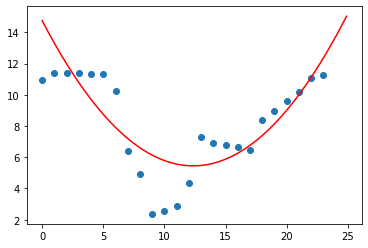

In [59]:
plt.scatter(df_weekday_2['hour'], df_weekday_2['mean_bikes_avail'])
x_axis = np.arange(0,25,0.1)
response = model_intercept + model_coefficients[1] * x_axis + model_coefficients[2] * x_axis**2
plt.plot(x_axis, response, color='r')
plt.show()

In [63]:
test_dataframe = df_test_list[0]
test_dataframe

,station_number,hour,weekend,available_bikes
0,2,0,False,7.233333
1,2,0,True,5.000000
2,2,1,False,7.400000
3,2,1,True,6.000000
4,2,2,False,7.400000
5,2,2,True,6.000000
6,2,3,False,7.400000
7,2,3,True,6.000000
8,2,4,False,7.400000
9,2,4,True,6.000000


In [64]:
test_dataframe_weekday = test_dataframe[test_dataframe['weekend'] == False]
test_dataframe_weekday

,station_number,hour,weekend,available_bikes
0,2,0,False,7.233333
2,2,1,False,7.400000
4,2,2,False,7.400000
6,2,3,False,7.400000
8,2,4,False,7.400000
10,2,5,False,7.400000
12,2,6,False,6.310345
14,2,7,False,3.333333
16,2,8,False,4.700000
18,2,9,False,4.066667


In [72]:
model.predict(poly.fit_transform(([ [12] ])))

array([5.4584894])

## Double-Check That Poly Regression Fits Well for Data

In [73]:
linear_model = LinearRegression()
lin_reg_model = linear_model.fit(X, y)

In [74]:
print("Features: \n", '[hour]')
print("Coeficients: \n", lin_reg_model.coef_)
print("\nIntercept: \n", lin_reg_model.intercept_)

Features: 
 [hour]
Coeficients: 
 [-0.10441351]

Intercept: 
 9.614837286844303


In [76]:
lin_reg_predictions = lin_reg_model.predict(X[['hour']])
actual_vs_predicted = pd.concat([y, pd.DataFrame(lin_reg_predictions, columns=['Linear_Predicted'], index=y.index)], axis=1)
actual_vs_predicted

,available_bikes,Linear_Predicted
0,11.883333,9.614837
2,12.378151,9.510424
4,12.386555,9.406010
6,12.420168,9.301597
8,12.336134,9.197183
10,12.341667,9.092770
12,11.166667,8.988356
14,7.200000,8.883943
16,4.960000,8.779529
18,1.968254,8.675116


In [78]:
poly_predictions = model.predict(poly.fit_transform((X[ ['hour'] ])))

In [79]:
actual_vs_predicted['Poly_Predicted'] = poly_predictions
actual_vs_predicted

,available_bikes,Linear_Predicted,Poly_Predicted
0,11.883333,9.614837,14.751597
2,12.378151,9.510424,13.307159
4,12.386555,9.406010,11.984542
6,12.420168,9.301597,10.783745
8,12.336134,9.197183,9.704768
10,12.341667,9.092770,8.747612
12,11.166667,8.988356,7.912276
14,7.200000,8.883943,7.198761
16,4.960000,8.779529,6.607066
18,1.968254,8.675116,6.137191


In [111]:
available_bikes = actual_vs_predicted['available_bikes']
Linear_Predicted = actual_vs_predicted['Linear_Predicted']
Poly_Predicted = actual_vs_predicted['Poly_Predicted']
Linear_Err = []
Poly_Err = []

In [112]:
print(Poly_Predicted)

0     14.751597
2     13.307159
4     11.984542
6     10.783745
8      9.704768
10     8.747612
12     7.912276
14     7.198761
16     6.607066
18     6.137191
20     5.789137
22     5.562903
24     5.458489
26     5.475896
28     5.615124
30     5.876171
32     6.259039
34     6.763728
36     7.390236
38     8.138566
40     9.008715
42    10.000685
44    11.114475
46    12.350086
Name: Poly_Predicted, dtype: float64


In [113]:
Linear_Predicted_list = []
Poly_Predicted_list = []
available_bikes_list = []

for value in available_bikes:
    available_bikes_list.append(value)
    
for value in Linear_Predicted:
    Linear_Predicted_list.append(value)
    
for value in Poly_Predicted:
    Poly_Predicted_list.append(value)

In [114]:
for i in range(len(Linear_Predicted_list)):
    linear_error = Linear_Predicted_list[i] - available_bikes_list[i]
    poly_error = Poly_Predicted_list[i] - available_bikes_list[i]
    Linear_Err.append(linear_error)
    Poly_Err.append(poly_error)

In [115]:
print(len(Linear_Err), len(Poly_Err))

24 24


In [116]:
actual_vs_predicted['Linear_Error'] = Linear_Err
actual_vs_predicted['Poly_Err'] = Poly_Err
actual_vs_predicted

,available_bikes,Linear_Predicted,Poly_Predicted,Linear_Error,Poly_Err
0,11.883333,9.614837,14.751597,-2.268496,2.868263
2,12.378151,9.510424,13.307159,-2.867727,0.929008
4,12.386555,9.406010,11.984542,-2.980544,-0.402013
6,12.420168,9.301597,10.783745,-3.118571,-1.636423
8,12.336134,9.197183,9.704768,-3.138951,-2.631366
10,12.341667,9.092770,8.747612,-3.248897,-3.594055
12,11.166667,8.988356,7.912276,-2.178310,-3.254390
14,7.200000,8.883943,7.198761,1.683943,-0.001239
16,4.960000,8.779529,6.607066,3.819529,1.647066
18,1.968254,8.675116,6.137191,6.706862,4.168937


In [118]:
import math

In [119]:
linear_square_sum_err = 0
poly_square_sum_err = 0
for i in range(len(Linear_Err)):
    squared_err = Linear_Err[i] ** 2
    linear_square_sum_err += squared_err
    
    poly_squared_err = Poly_Err[i] ** 2
    poly_square_sum_err += poly_squared_err
    
print(linear_square_sum_err, poly_square_sum_err)

256.6367561597686 93.93863707496664


In [120]:
average_LSSE = linear_square_sum_err / len(Linear_Err)
average_PSSE = poly_square_sum_err / len(Poly_Err)

print(average_LSSE, average_PSSE)

10.693198173323692 3.9141098781236097


In [122]:
Linear_RMSE = math.sqrt(average_LSSE)
Poly_RMSE = math.sqrt(average_PSSE)

print(Linear_RMSE, Poly_RMSE)

3.2700455919334965 1.9784109477364933


The polynomial regression line appears to be a more accurate regression model than the linear model and so this is the model that was deemed more appropriate for implementation for weekday models. Given that the weekend models had not been evaluated using this testing method, further testing is necessary to determine if a polynomial order of 2 is more appropriate for modelling said data than simple linear regression.